# Exploration and Comparison of Transformers for Image Classification

## CLIP (Contrastive Language-Image Pre-training)


### Prerequisites

In [2]:
import os
os.chdir('..')

import torch
import torch.nn as nn

from transformers import CLIPImageProcessor, CLIPTokenizer
from datasets import load_dataset, concatenate_datasets

from src.dataset_builder import ImageDataset
from src.models import CLIP
from src.train import train_model, evaluate_model

from utils.config import Config
from utils.train_utils import *
from utils.models_utils import *
from utils.visualization_utils import *
from utils.data_cleaning import *

### GPU

In [3]:
get_gpu_info()

GPU 0: NVIDIA A100 80GB PCIe MIG 2g.20gb
VRAM: 19.50 GB


### Data preparation

In [4]:
processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch16")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")

In [17]:
resisc45 = load_dataset('timm/resisc45')
clean_labels(resisc45, name='resisc45');
resisc45 = ImageDataset(
    dataset=resisc45['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="satellite imagery of {}.",
)
resisc45.dataset

Dataset({
    features: ['image', 'label', 'image_id'],
    num_rows: 6300
})

In [18]:
food101 = load_dataset('ethz/food101')
clean_labels(food101, name='food101');
food101 = ImageDataset(
    dataset=food101['validation'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="a photo of {}, a type of food.",
)
food101.dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 25250
})

In [5]:
fer2013 = load_dataset('AutumnQiu/fer2013')
clean_labels(fer2013, name='fer2013');
fer2013 = ImageDataset(
    dataset=fer2013['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="a photo of a {} looking face.",
)
fer2013.dataset

Dataset({
    features: ['label', 'image'],
    num_rows: 3589
})

In [6]:
pcam = load_dataset('zacharielegault/PatchCamelyon')
clean_labels(pcam, name='pcam');
pcam = ImageDataset(
    dataset=pcam['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="this is a photo of {}.",
)
pcam.dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 32768
})

In [19]:
sun397 = load_dataset('dpdl-benchmark/sun397')
clean_labels(sun397, name='sun397');
sun397 = ImageDataset(
    dataset=sun397['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="a photo of a {}.",
)
sun397.dataset

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/28 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 21750
})

In [20]:
country211 = load_dataset('nateraw/country211')
clean_labels(country211, name='country211');
country211 = ImageDataset(
    dataset=country211['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="a photo i took in {}.",
)
country211.dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 21100
})

In [21]:
dtd = load_dataset('tanganke/dtd')
clean_labels(dtd, name='dtd');
dtd = ImageDataset(
    dataset=dtd['test'],
    processor=processor,
    tokenizer=tokenizer,
    create_captions=True,
    prompt="a photo of a {} texture."
)
dtd.dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1880
})

### Model

In [7]:
config = Config()

In [8]:
model = CLIP()

In [9]:
get_model_params(model)

Parameters: 149.62M


### Zero-shot prediction

In [10]:
id = 24
torch.manual_seed(123)

#### RESISC45

In [23]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    model,
    resisc45,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 788/788 [01:23<00:00,  9.45it/s]

Zero-shot evaluation completed: loss: 1.2502 | acc: 0.6170


In [24]:
get_top_5_accuracies(resisc45_per_class_acc)

[('golf course', 0.9918032786885246),
 ('parking lot', 0.9777777777777777),
 ('beach', 0.9538461538461539),
 ('roundabout', 0.9328358208955224),
 ('bridge', 0.9285714285714286)]

In [25]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('chaparral', 0.007575757575757576),
 ('ground track field', 0.06299212598425197),
 ('commercial area', 0.06428571428571428),
 ('terrace', 0.07874015748031496),
 ('airplane', 0.10650887573964497)]

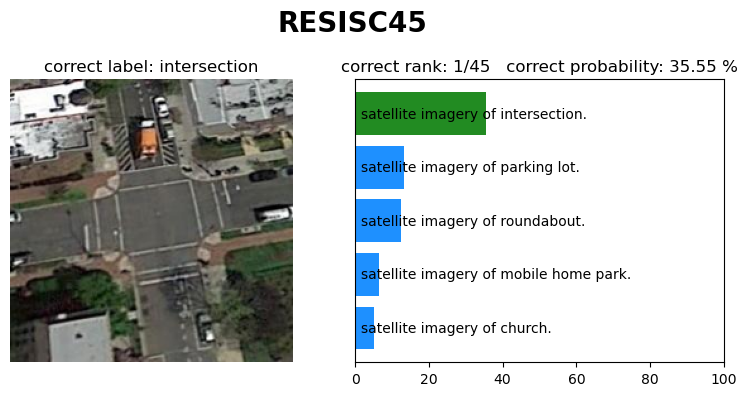

In [27]:
visualize_zero_shot_predict(
    model=model, 
    image=resisc45.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=resisc45.get_captions(),
    labels=resisc45.get_labels(),
    label=resisc45.get_label(id),
    prompt=resisc45.get_prompt(),
    title='RESISC45',
    config=config,
) 

#### Food-101

In [20]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    model,
    food101,
    config,
    zero_shot=True
)

Zero-shot:  15%|█▌        | 475/3157 [01:11<06:40,  6.69it/s]/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))
Zero-shot: 100%|██████████| 3157/3157 [07:53<00:00,  6.66it/s]

Zero-shot evaluation completed: loss: 0.3880 | acc: 0.8872


In [21]:
get_top_5_accuracies(food101_per_class_acc)

[('edamame', 1.0),
 ('caesar salad', 0.988),
 ('oysters', 0.988),
 ('lobster roll sandwich', 0.984),
 ('seaweed salad', 0.984)]

In [22]:
get_bottom_5_accuracies(food101_per_class_acc)

[('steak', 0.344),
 ('ice cream', 0.644),
 ('foie gras', 0.696),
 ('cup cakes', 0.72),
 ('tacos', 0.724)]

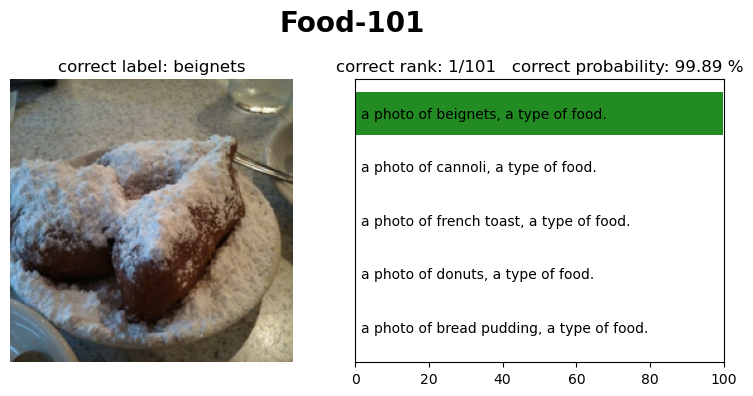

In [24]:
visualize_zero_shot_predict(
    model=model, 
    image=food101.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=food101.get_captions(),
    labels=food101.get_labels(),
    label=food101.get_label(id),
    prompt=food101.get_prompt(),
    title='Food-101',
    config=config
) 

#### FER2013

In [11]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    model,
    fer2013,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 449/449 [00:41<00:00, 10.75it/s]

Zero-shot evaluation completed: loss: 1.4775 | acc: 0.4358


In [28]:
fer2013_per_class_acc

{'angry': 0.5234215885947047,
 'disgust': 0.14545454545454545,
 'fear': 0.6117424242424242,
 'happy': 0.6951080773606371,
 'sad': 0.2946127946127946,
 'surprise': 0.15144230769230768,
 'neutral': 0.20287539936102236}

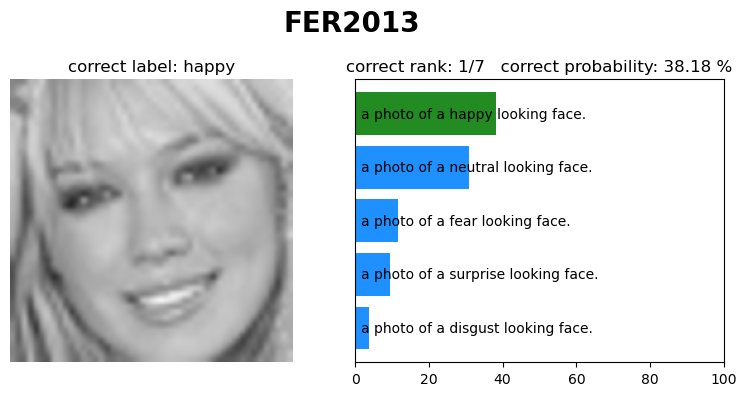

In [29]:
visualize_zero_shot_predict(
    model=model, 
    image=fer2013.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=fer2013.get_captions(),
    labels=fer2013.get_labels(),
    label=fer2013.get_label(id),
    prompt=fer2013.get_prompt(),
    title='FER2013',
    config=config
)

#### PCam

In [13]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    model,
    pcam,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 4096/4096 [06:17<00:00, 10.84it/s]

Zero-shot evaluation completed: loss: 0.6889 | acc: 0.5528


In [30]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.48130071380635714,
 'lymph node tumor tissue': 0.6244122855223789}

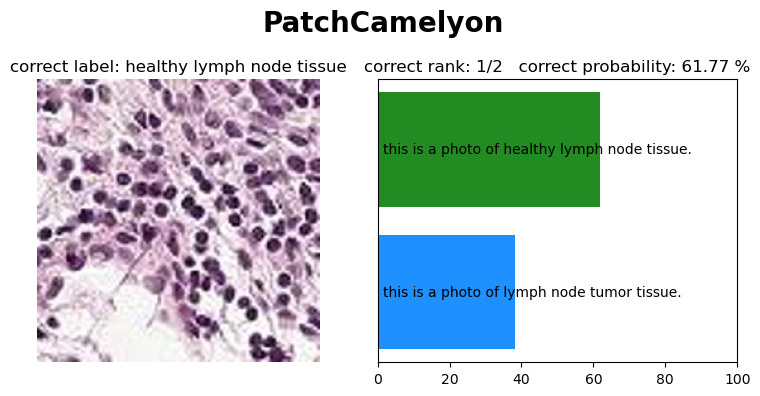

In [31]:
visualize_zero_shot_predict(
    model=model, 
    image=pcam.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=pcam.get_captions(),
    labels=pcam.get_labels(),
    label=pcam.get_label(id),
    prompt=pcam.get_prompt(),
    title='PatchCamelyon',
    config=config
)

#### SUN397

In [32]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    model,
    sun397,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 2719/2719 [10:11<00:00,  4.44it/s]


Zero-shot evaluation completed: loss: 1.4726 | acc: 0.5961


In [33]:
get_top_5_accuracies(sun397_per_class_acc)

[('cubicle (office)', 1.0),
 ('heliport', 1.0),
 ('rock arch', 1.0),
 ('rope bridge', 1.0),
 ('skatepark', 1.0)]

In [34]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('berth', 0.0),
 ('conference center', 0.0),
 ('ladning deck', 0.0),
 ('library (outdoor)', 0.0),
 ('pavilion', 0.0)]

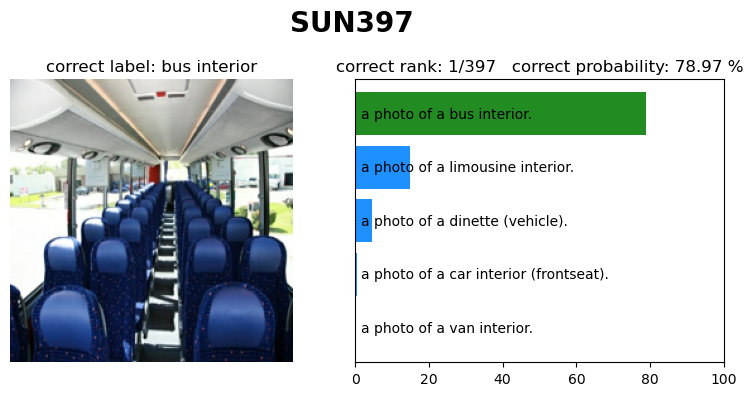

In [36]:
visualize_zero_shot_predict(
    model=model, 
    image=sun397.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=sun397.get_captions(),
    labels=sun397.get_labels(),
    label=sun397.get_label(id),
    prompt=sun397.get_prompt(),
    title='SUN397',
    config=config,
)

#### Country211

In [37]:
country211_loss, country211_acc, country211_per_class_acc = evaluate_model(
    model,
    country211,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 2638/2638 [08:35<00:00,  5.12it/s]


Zero-shot evaluation completed: loss: 3.4911 | acc: 0.2041


In [38]:
get_top_5_accuracies(country211_per_class_acc)

[('Bhutan', 0.72),
 ('Andorra', 0.61),
 ('Turkmenistan', 0.6),
 ('Falkland Islands (Malvinas)', 0.58),
 ('Botswana', 0.57)]

In [40]:
get_bottom_5_accuracies(country211_per_class_acc)

[('Cameroon', 0.0),
 ('Georgia', 0.0),
 ('Jamaica', 0.0),
 ('Panama', 0.0),
 ('Virgin Islands, British', 0.0)]

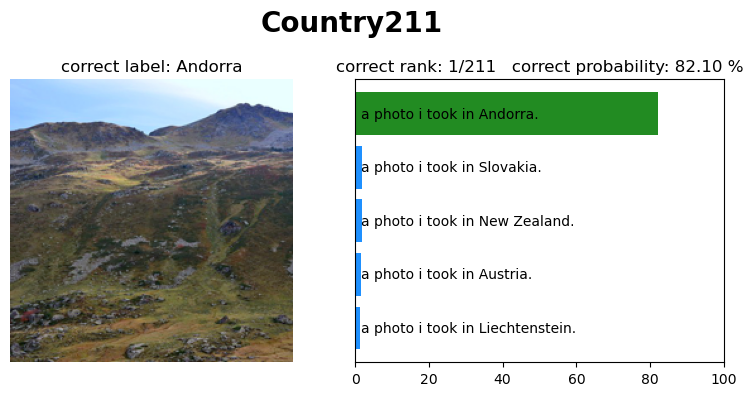

In [41]:
visualize_zero_shot_predict(
    model=model, 
    image=country211.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=country211.get_captions(),
    labels=country211.get_labels(),
    label=country211.get_label(id),
    prompt=country211.get_prompt(),
    title='Country211',
    config=config
)

#### DTD

In [42]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    model,
    dtd,
    config,
    zero_shot=True
)

Zero-shot: 100%|██████████| 235/235 [00:30<00:00,  7.77it/s]

Zero-shot evaluation completed: loss: 2.0946 | acc: 0.4298


In [43]:
get_top_5_accuracies(dtd_per_class_acc)

[('chequered', 1.0),
 ('crystalline', 0.975),
 ('knitted', 0.975),
 ('paisley', 0.975),
 ('bubbly', 0.95)]

In [45]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('dotted', 0.0),
 ('flecked', 0.0),
 ('lacelike', 0.0),
 ('potholed', 0.0),
 ('grooved', 0.025)]

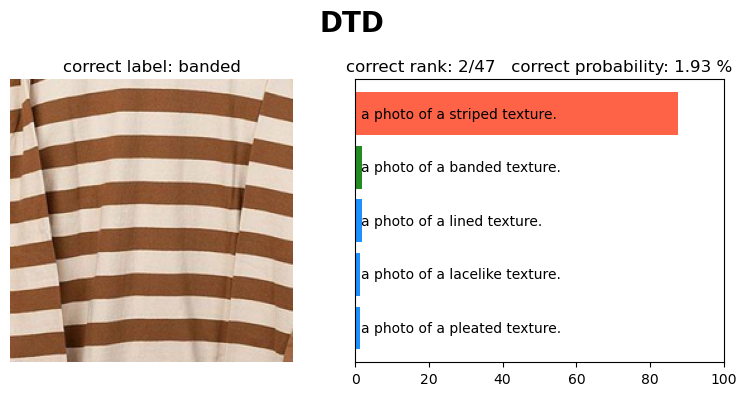

In [46]:
visualize_zero_shot_predict(
    model=model, 
    image=dtd.get_image(id),
    processor=processor,
    tokenizer=tokenizer,
    captions=dtd.get_captions(),
    labels=dtd.get_labels(),
    label=dtd.get_label(id),
    prompt=dtd.get_prompt(),
    title='DTD',
    config=config
)